In [1]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

4422102/4422102 [==============================] - 1s 0us/step


<Figure size 640x480 with 0 Axes>

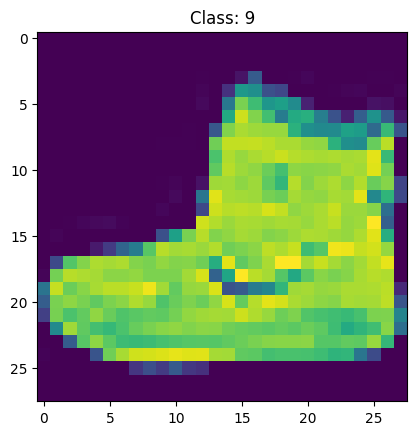

<Figure size 640x480 with 0 Axes>

In [2]:
# Loading Dataset
from keras.datasets import fashion_mnist
(x_train, x_lab),(y_test, y_lab) = fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

<Figure size 640x480 with 0 Axes>

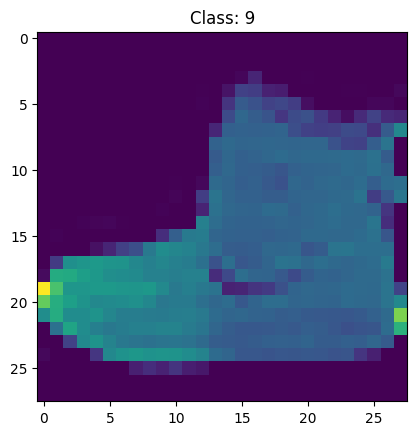

<Figure size 640x480 with 0 Axes>

In [3]:
# Normalizing the Data
x_train = keras.utils.normalize(x_train, axis = 1)
y_test = keras.utils.normalize(y_test, axis = 1)
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

In [4]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
# Compiling the Model
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [6]:
# Fitting the Model
model.fit(x_train, x_lab, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4886 - accuracy: 0.8253
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3627 - accuracy: 0.8671
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3224 - accuracy: 0.8819
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2986 - accuracy: 0.8892
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.8951
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2645 - accuracy: 0.9001
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2512 - accuracy: 0.9055
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2384 - accuracy: 0.9094
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2270 - accuracy: 0.9133
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.21

In [7]:
# Evaluating on the Test Data
model.evaluate(y_test, y_lab)

313/313 [==============================] - 2s 4ms/step - loss: 0.3399 - accuracy: 0.8861


[0.33991482853889465, 0.8860999941825867]

In [8]:
# Predict the first 10 images, Probability Distribution
p = model.predict(y_test[:10])
print(p)



1/1 [==============================] - 0s 172ms/step
[[5.23334188e-11 1.06944786e-18 1.38850202e-08 1.52250001e-09
  8.30420734e-14 1.26258408e-06 5.98739280e-10 3.88812274e-03
  9.46297929e-10 9.96110559e-01]
 [7.33708846e-04 1.13435088e-10 9.97505844e-01 4.02297559e-07
  2.29067431e-04 6.62442474e-08 1.53085426e-03 5.56687407e-09
  4.41783034e-11 2.29108155e-09]
 [1.27244721e-05 9.99987185e-01 3.40361961e-10 1.84078761e-08
  2.42504772e-08 2.44944662e-13 4.34993837e-08 2.76073554e-16
  6.10543604e-12 1.19069340e-16]
 [9.65583169e-09 9.99999940e-01 5.99026644e-12 2.52130761e-08
  4.09572714e-08 1.53727698e-13 7.11129100e-10 2.38985631e-18
  2.60858988e-13 3.34916960e-17]
 [2.18688294e-01 1.68918890e-09 4.70586470e-04 2.94743717e-04
  3.24441557e-04 2.78612561e-07 7.80221522e-01 3.35297905e-08
  1.00877244e-07 5.56544699e-10]
 [1.42859062e-04 9.99840736e-01 3.52794382e-06 5.97280916e-07
  9.03988712e-06 2.68023329e-11 3.17157719e-06 3.52097197e-14
  1.14834305e-11 9.25728555e-16]
 [2.6

In [9]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_lab[:10])


[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


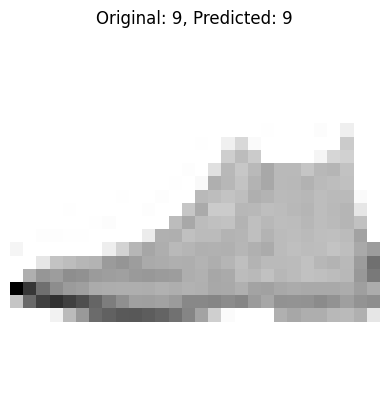

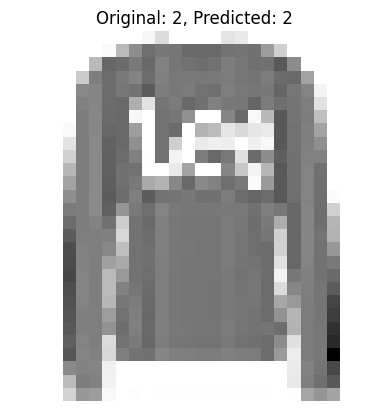

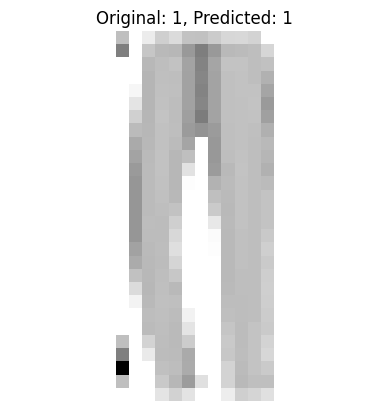

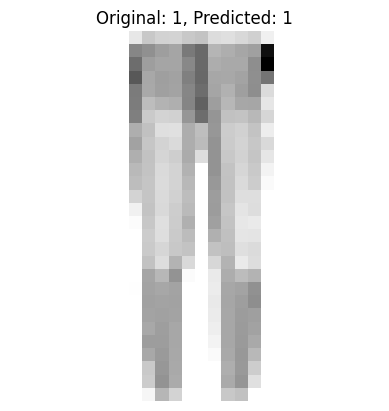

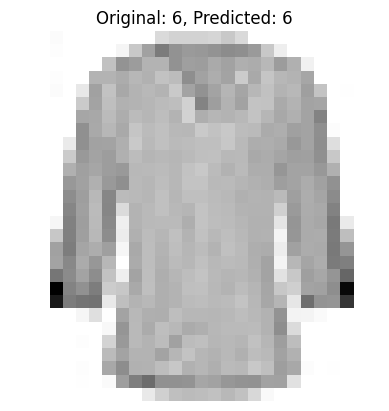

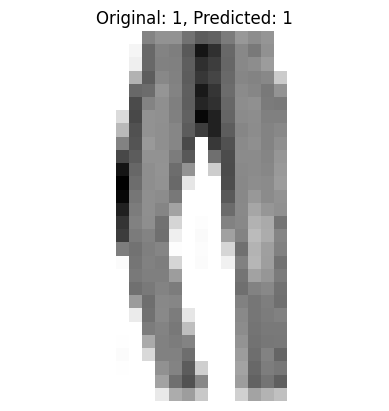

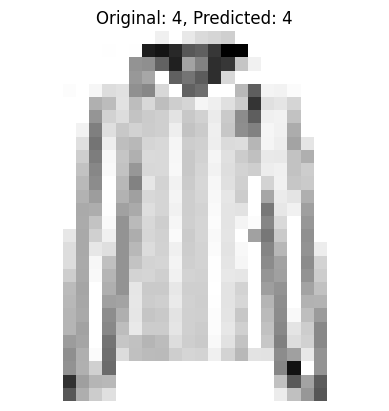

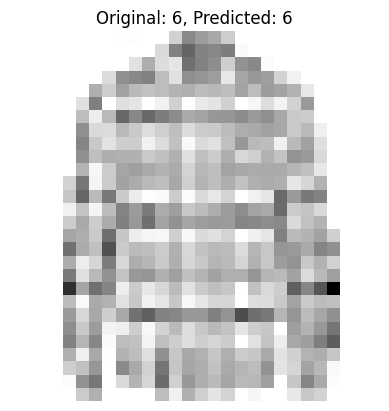

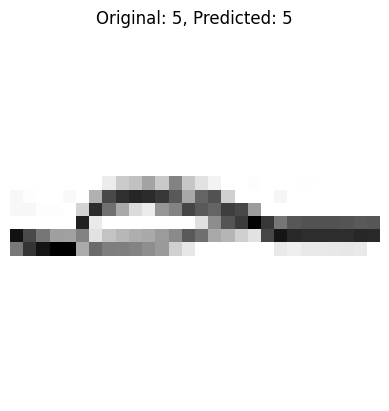

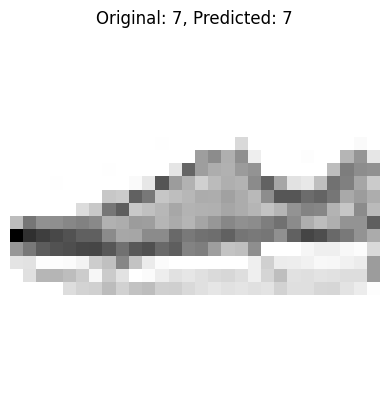

<Figure size 640x480 with 0 Axes>

In [10]:
# Visualizing the result
for i in range(10):
  plt.imshow(y_test[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_lab[i], pred[i]))
  plt.axis("Off")
  plt.figure()